In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import json
import io

## Latency under load over the years

In [2]:
up_df = pd.read_csv('data/LUL_upstream_median_rtt_max.csv')
down_df = pd.read_csv('data/LUL_downstream_median_rtt_max.csv')
up_df['dtime per 30 days'] = pd.to_datetime(up_df['dtime per 30 days'], format='%Y-%m-%d')
down_df['dtime per 30 days'] = pd.to_datetime(down_df['dtime per 30 days'], format='%Y-%m-%d')

# Convert time series with index Month
up_df.index = up_df['dtime per 30 days']
down_df.index = down_df['dtime per 30 days']
del up_df['dtime per 30 days']
del down_df['dtime per 30 days']
print(up_df.head())
print(down_df.head())

                   Upstream LUL
dtime per 30 days              
2010-12-27                  NaN
2011-01-26              900.103
2011-02-25              865.902
2011-03-27              847.313
2011-04-26              847.045
                   Downstream LUL
dtime per 30 days                
2010-12-27                    NaN
2011-01-26                154.115
2011-02-25                139.764
2011-03-27                133.500
2011-04-26                139.758


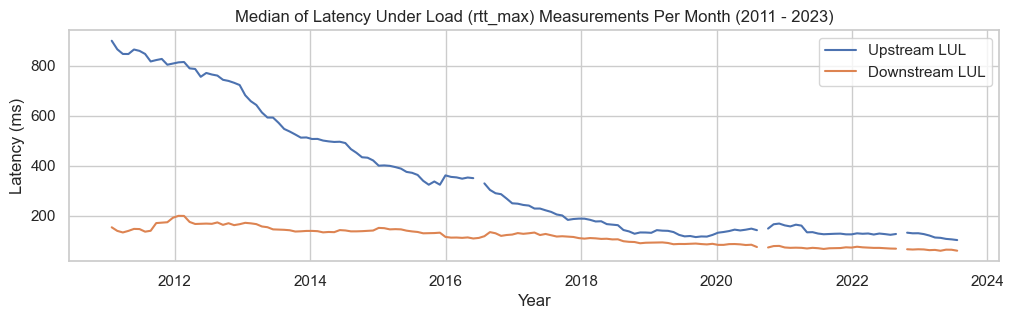

In [3]:
# Plot
sns.set_theme(style="whitegrid")
#sns.lineplot(df)
#plt.plot(df, color="blue", label="PC99")
plt.figure(figsize=(12,3))
plt.plot(up_df, label="Upstream LUL")
plt.plot(down_df, label="Downstream LUL")
plt.ylabel('Latency (ms)')
plt.xlabel('Year')
plt.title('Median of Latency Under Load (rtt_max) Measurements Per Month (2011 - 2023)')
plt.legend(loc="best")
plt.xlabel('Year')
plt.show()

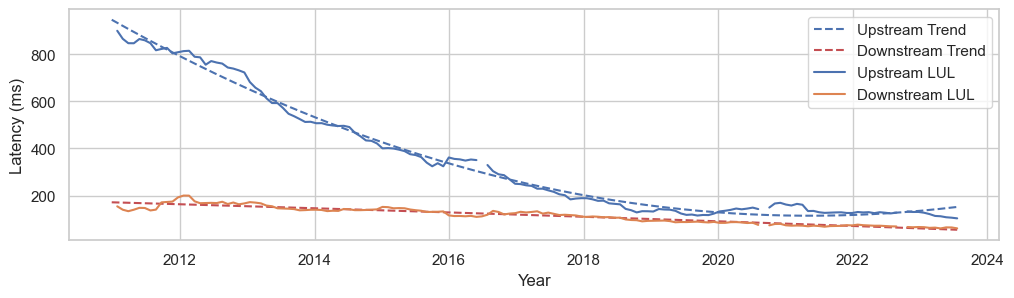

In [4]:
x_dates = up_df.index
x_num = dates.date2num(x_dates)
up_y = up_df['Upstream LUL']
down_y = down_df['Downstream LUL']
up_idx = np.isfinite(up_y) & np.isfinite(x_num)
down_idx = np.isfinite(down_y) & np.isfinite(x_num)

# Calculate fit line
up_trend = np.polyfit(x_num[up_idx], up_y[up_idx], 2)
up_fit = np.poly1d(up_trend)

down_trend = np.polyfit(x_num[down_idx], down_y[down_idx], 2)
down_fit = np.poly1d(down_trend)

# Not really necessary to convert the values back into dates
#but added as a demonstration in case one wants to plot non-linear curves
x_fit = np.linspace(x_num.min(), x_num.max())
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12,3))
plt.plot(dates.num2date(x_fit), up_fit(x_fit), "b--", label="Upstream Trend")
plt.plot(dates.num2date(x_fit), down_fit(x_fit), "r--", label="Downstream Trend")
plt.plot(up_df, label="Upstream LUL")
plt.plot(down_df, label="Downstream LUL")
plt.ylabel('Latency (ms)')
plt.xlabel('Year')
# plt.title('Median of Latency Under Load (rtt_max) Measurements Per Month (2011 - 2023)')
plt.legend(loc="best")
plt.xlabel('Year')

# And show
plt.show()

## Median of downstream LUL by technology

In [2]:
df = pd.read_csv('data/Downstream LUL over the years by technology - rtt_max.csv')
df['dtime per 30 days'] = pd.to_datetime(df['dtime per 30 days'], format='%Y-%m-%d')
df.head()

,Top 3 values of operator_technology,dtime per 30 days,Median Latency (ms)
0,Cable,2010-12-27,NaN
1,Cable,2011-01-26,130.779
2,Cable,2011-02-25,105.246
3,Cable,2011-03-27,99.597
4,Cable,2011-04-26,100.260


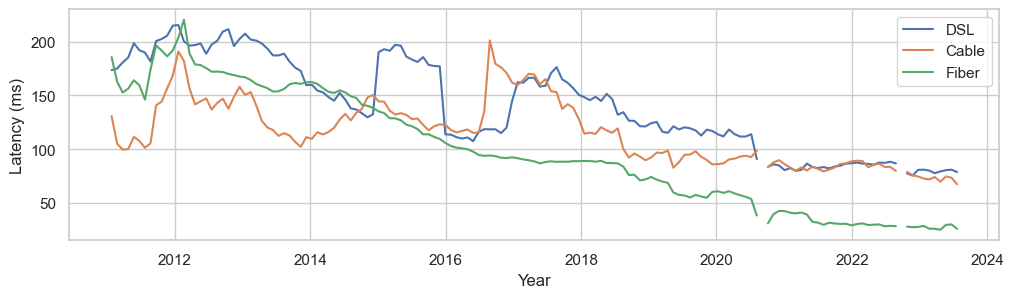

In [3]:
# General plot again
plt.figure(figsize=(12,3))
sns.set_theme(style="whitegrid")

for tech in ["DSL", "Cable", "Fiber"]:
    temp_df = df[df["Top 3 values of operator_technology"] == tech]
    x_dates = temp_df["dtime per 30 days"]
    x_num = dates.date2num(x_dates)
    y = temp_df['Median Latency (ms)']
    idx = np.isfinite(y) & np.isfinite(x_num)
    x_fit = np.linspace(x_num.min(), x_num.max())

    # plt.plot(dates.num2date(x_fit), fit(x_fit), "r--", label=f"{tech} Trend")
    plt.plot(x_dates, y, label=f"{tech}")

plt.ylabel('Latency (ms)')
plt.xlabel('Year')
# plt.title(f"Median of Downstream LUL (rtt_max) Measurements Per Month (2011 - 2023) by technology")
plt.legend(loc="best")
# And show
plt.show()

In [4]:
def plot_median_lul_by_tech(tech):
    temp_df = df[df["Top 3 values of operator_technology"] == tech]
    x_dates = temp_df["dtime per 30 days"]
    x_num = dates.date2num(x_dates)
    y = temp_df['Median Latency (ms)']
    idx = np.isfinite(y) & np.isfinite(x_num)

    # Calculate fit line
    trend = np.polyfit(x_num[idx], y[idx], 3)
    fit = np.poly1d(trend)

    # General plot again
    plt.figure(figsize=(12,3))

    x_fit = np.linspace(x_num.min(), x_num.max())
    sns.set_theme(style="whitegrid")
    plt.plot(dates.num2date(x_fit), fit(x_fit), "r--", label="Trend")
    plt.plot(x_dates, y, label="Median latency")
    plt.ylabel('Latency (ms)')
    plt.xlabel('Year')
    plt.title(f"Median of Downstream LUL (rtt_max) Measurements Per Month (2011 - 2023) for {tech}")
    plt.legend(loc="best")
    plt.xlabel('Year')

    # And show
    plt.show()

### Cable

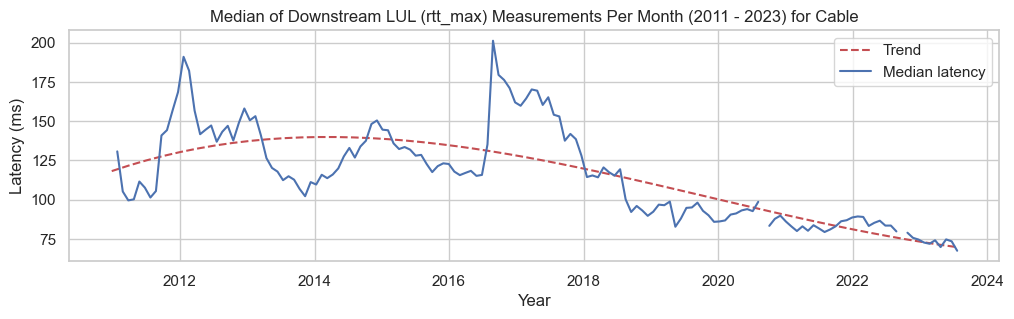

In [5]:
plot_median_lul_by_tech("Cable")

### Fiber

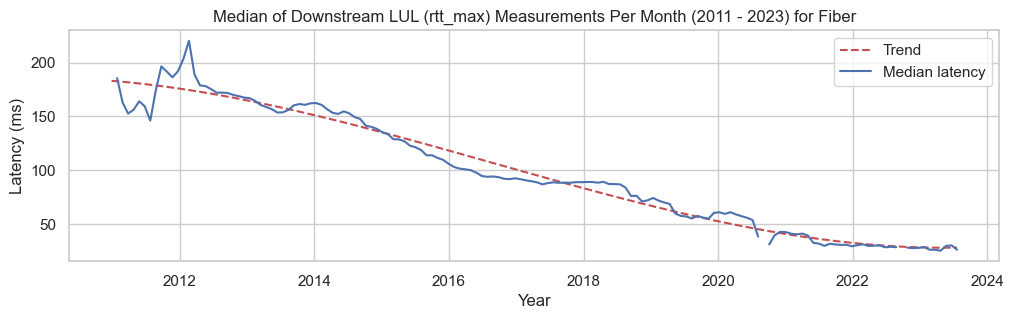

In [6]:
plot_median_lul_by_tech("Fiber")

### DSL

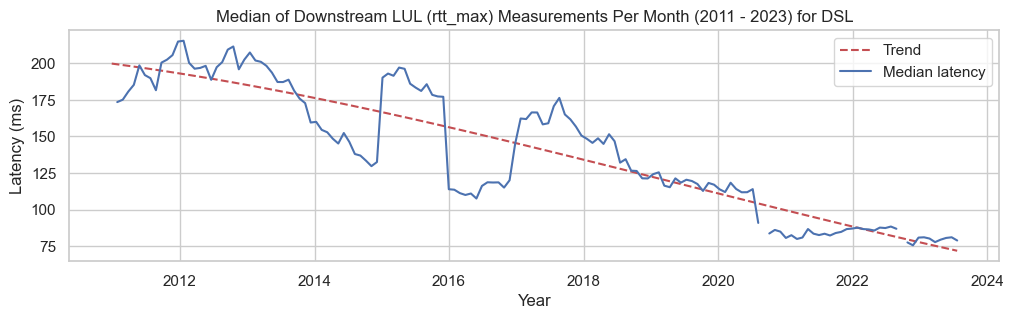

In [7]:
plot_median_lul_by_tech("DSL")

## Median of upstream LUL by technology

In [8]:
df = pd.read_csv('data/Upstream LUL over the years by technology - rtt_max.csv')
df['dtime per 30 days'] = pd.to_datetime(df['dtime per 30 days'], format='%Y-%m-%d')
df['Median Latency (ms)'] = df['Median Latency (ms)'].str.replace(",","").astype(float)
df.head()

,Top 3 values of operator_technology,dtime per 30 days,Median Latency (ms)
0,Cable,2010-12-27,NaN
1,Cable,2011-01-26,903.042
2,Cable,2011-02-25,825.902
3,Cable,2011-03-27,799.604
4,Cable,2011-04-26,802.219


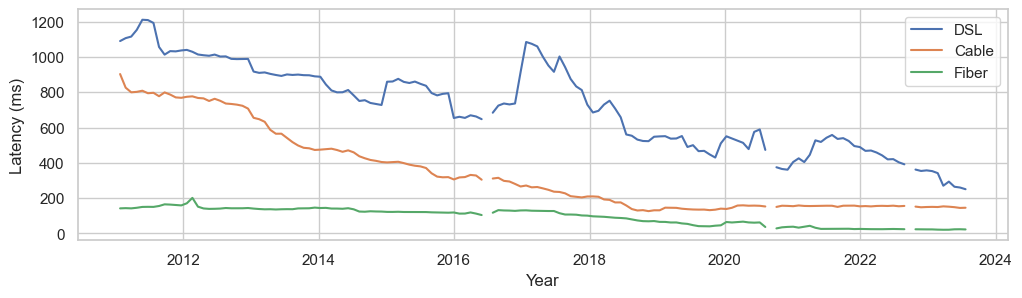

In [9]:
# General plot again
plt.figure(figsize=(12,3))
sns.set_theme(style="whitegrid")

for tech in ["DSL", "Cable", "Fiber"]:
    temp_df = df[df["Top 3 values of operator_technology"] == tech]
    x_dates = temp_df["dtime per 30 days"]
    x_num = dates.date2num(x_dates)
    y = temp_df['Median Latency (ms)']
    idx = np.isfinite(y) & np.isfinite(x_num)
    x_fit = np.linspace(x_num.min(), x_num.max())

    # plt.plot(dates.num2date(x_fit), fit(x_fit), "r--", label=f"{tech} Trend")
    plt.plot(x_dates, y, label=f"{tech}")

plt.ylabel('Latency (ms)')
plt.xlabel('Year')
# plt.title(f"Median of Downstream LUL (rtt_max) Measurements Per Month (2011 - 2023) by technology")
plt.legend(loc="best")
# And show
plt.show()

In [10]:
def plot_median_lul_by_tech(tech):
    temp_df = df[df["Top 3 values of operator_technology"] == tech]
    x_dates = temp_df["dtime per 30 days"]
    x_num = dates.date2num(x_dates)
    y = temp_df['Median Latency (ms)']
    idx = np.isfinite(y) & np.isfinite(x_num)

    # Calculate fit line
    trend = np.polyfit(x_num[idx], y[idx], 3)
    fit = np.poly1d(trend)

    # General plot again
    plt.figure(figsize=(12,3))

    x_fit = np.linspace(x_num.min(), x_num.max())
    sns.set_theme(style="whitegrid")
    plt.plot(dates.num2date(x_fit), fit(x_fit), "b--", label="Trend")
    plt.plot(x_dates, y, label="Median latency")
    plt.ylabel('Latency (ms)')
    plt.xlabel('Year')
    plt.title(f"Median of upstream LUL (rtt_max) Measurements Per Month (2011 - 2023) for {tech}")
    plt.legend(loc="best")
    plt.xlabel('Year')

    # And show
    plt.show()

### Cable

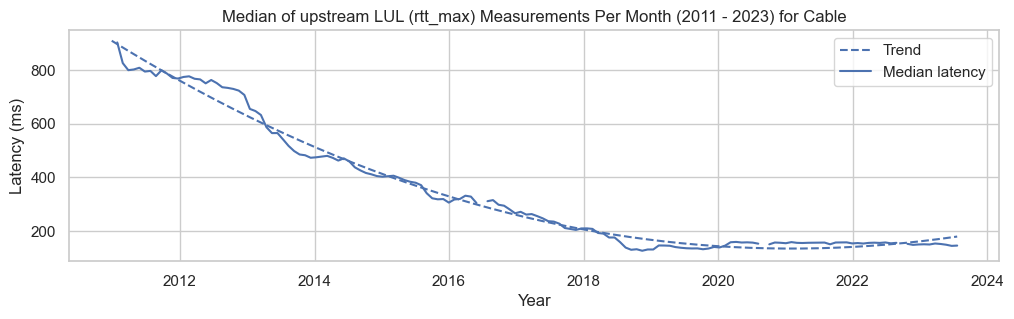

In [11]:
plot_median_lul_by_tech("Cable")

### Fiber

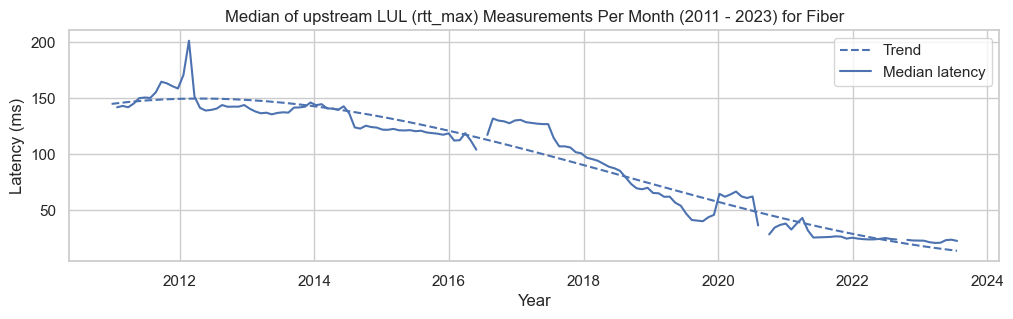

In [12]:
plot_median_lul_by_tech("Fiber")

### DSL

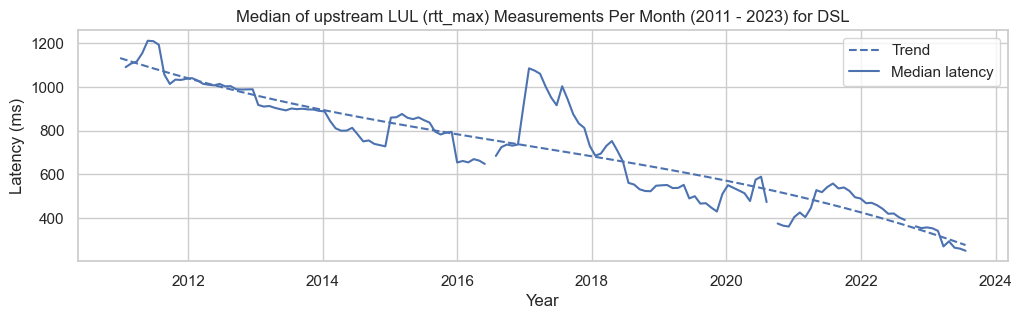

In [13]:
plot_median_lul_by_tech("DSL")